In [1]:
import os
import PATH
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
import ribo_public.parse_ribosome as Pribo
from sklearn import preprocessing

/home/wergillius/Project/UTR_VAE


## pretrain Reconstructor

<font size=3 color='orange'>**read in df**


In [51]:
NBT_dir = "/data/users/wergillius/UTR_VAE/Ex_data"

unmod1_df= pd.read_csv(os.path.join(NBT_dir,"GSM3130435_egfp_unmod_1.csv"),index_col=0)
unmod2_df= pd.read_csv(os.path.join(NBT_dir,"GSM3130436_egfp_unmod_2.csv"),index_col=0)

pseudo1_df= pd.read_csv(os.path.join(NBT_dir,'GSM3130437_egfp_pseudo_1.csv'),index_col=0)
design_df = pd.read_csv(os.path.join(NBT_dir,'GSM3130443_designed_library.csv'),index_col=0)
vleng_df  = pd.read_csv(os.path.join(NBT_dir,"GSM4084997_varying_length_25to100.csv"),index_col=0)

<font size=3 color='orange'>**normalzie MRL**

In [13]:
# integrate them
big_pretrain_df = pd.DataFrame([])
big_pretrain_df=big_pretrain_df.append([unmod2_df,pseudo1_df,design_df])

rl = big_pretrain_df.rl.values.reshape(-1,1)
# by naming the scaler we can keep it for later used
consistant_scaler = preprocessing.StandardScaler().fit(rl)
for df in [unmod2_df,pseudo1_df,design_df,vleng_df]:
    df['scaled_rl'] = consistant_scaler.transform(df.rl.values.reshape(-1,1))

In [56]:
# if normalize seperatly
for df in [unmod1_df,unmod2_df,pseudo1_df,design_df,vleng_df]:
    df['scaled_rl'] = preprocessing.StandardScaler().fit_transform(df.rl.values.reshape(-1,1))

<font size=3 color='orange'>**label motif**


In [61]:
# the motif to detect
motif_detect = ['uAUG', 'GCC', 'GGC', 'CGG', 'GGG', 'CCC', 'TTT', 'AAA']


# before detecting uAUG , check out the existance of start codon 
for df in [unmod1_df,unmod2_df,pseudo1_df,design_df,vleng_df]:
    with_uAUG = df.utr.apply(lambda x: 'ATG' in x)
    print(np.sum(with_uAUG)==df.shape[0])

for df in [unmod2_df,pseudo1_df]:
    df["meet_kozak"] = df.utr.apply(Pribo.kozak_consensus_test,args=(-9,False,))
    df["with_uAUG"] = df.utr.apply(lambda x: int("ATG" in x[:-9]))
for df in [unmod1_df,design_df,vleng_df]:
    df['with_uAUG'] = df.utr.apply(lambda x: int("ATG" in x))

# label the motif detected
for motif in motif_detect[1:]:           # not include uAUG
    detect_func = lambda x : int(motif in x)
    for df in [unmod1_df,unmod2_df,pseudo1_df,design_df,vleng_df]:
        
        df['with_%s'%motif] = df.utr.apply(detect_func)

False
True
True
False
False


In [16]:
for df in [unmod2_df,pseudo1_df]:
    df.loc[:,"full_utr"] = df.utr.values
    df.loc[:,'utr'] = df.utr.apply(lambda x: x[:-9])

In [62]:
unmod1_df.to_csv(os.path.join(NBT_dir,"GSM3130435_egfp_unmod_1.csv"),index=False)
unmod2_df.to_csv(os.path.join(NBT_dir,"GSM3130436_egfp_unmod_2.csv"),index=False)

pseudo1_df.to_csv(os.path.join(NBT_dir,'GSM3130437_egfp_pseudo_1.csv'),index=False)
design_df.to_csv(os.path.join(NBT_dir,'GSM3130443_designed_library.csv'),index=False)
vleng_df.to_csv(os.path.join(NBT_dir,"GSM4084997_varying_length_25to100.csv"),index=False)

In [ ]:
unmod2_df

In [17]:
big_pretrain_df = pd.DataFrame([])
big_pretrain_df=big_pretrain_df.append([unmod2_df,pseudo1_df,design_df])

big_pretrain_df.to_csv(os.path.join(NBT_dir,'unmod2_p1_design.csv'),index=False)
print((big_pretrain_df.columns))

Index(['utr', '00', '01', '02', '03', '04', '05', '06', '07', '08', '09',
       '010', '011', 'total', 'r_00', 'r_01', 'r_02', 'r_03', 'r_04', 'r_05',
       'r_06', 'r_07', 'r_08', 'r_09', 'r_010', 'r_011', 'rl', 'scaled_rl',
       'meet_kozak', 'with_uAUG', 'with_GCC', 'with_GGC', 'with_CGG',
       'with_GGG', 'with_CCC', 'with_TTT', 'with_AAA', 'full_utr', '012',
       'r_012', 'r00', 'r01', 'r02', 'r03', 'r04', 'r05', 'r06', 'r07', 'r08',
       'r09', 'r010', 'r011', 'r012', '0', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', '10', '11', '12', '13', 'r0', 'r1', 'r2', 'r3', 'r4', 'r5',
       'r6', 'r7', 'r8', 'r9', 'r10', 'r11', 'r12', 'r13', 'r_total', 'id',
       'info1', 'info2', 'info3', 'info4', 'library', 'mother', 'designed',
       'match_score'],
      dtype='object')


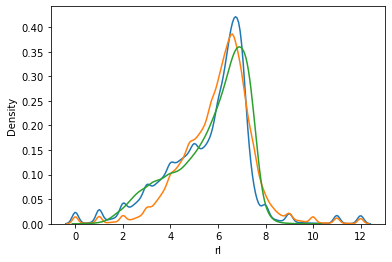

In [17]:
for big_pretrain_df in [unmod2_df,pseudo1_df,design_df]:
    sns.kdeplot(big_pretrain_df.rl)

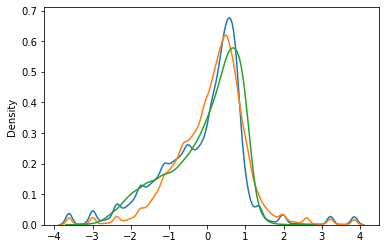

In [19]:
for df in [unmod2_df,pseudo1_df,design_df]:
    scaled_rl = consistant_scaler.transform(df.rl.values.reshape(-1,1))
    sns.kdeplot(scaled_rl.flatten())

# plot

In [18]:
NBT_dir = "/data/users/wergillius/UTR_VAE/Ex_data"
round_random_index = np.load(os.path.join(NBT_dir,'random_index.M.npy'))

In [26]:
NBT_dir = "/data/users/wergillius/UTR_VAE/Ex_data"
round_random_index = np.load(os.path.join(NBT_dir,'random_index.M.npy'))
small_model_df = pd.read_csv(os.path.join(NBT_dir,'small_model_dataset.csv'))

In [27]:
rl_M = small_model_df.scaled_rl.values

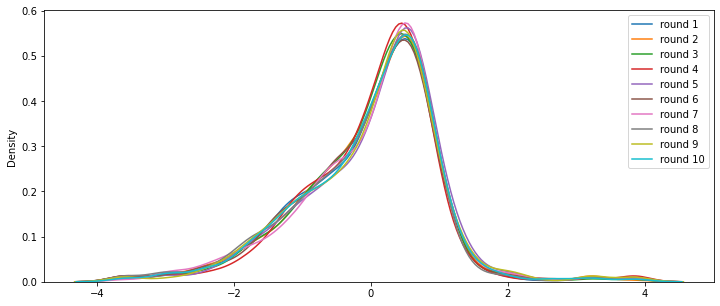

In [33]:
plt.figure(figsize=(12,5))
for i in range(10):
    sns.kdeplot(rl_M[round_random_index[i][:1500]],label="round %s"%(i+1));
plt.legend()

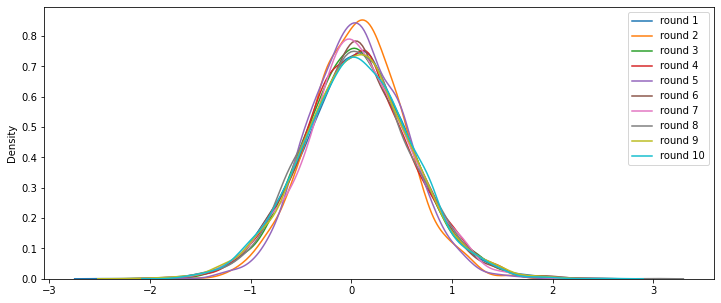

In [43]:
plt.figure(figsize=(12,5))
rl_big_df_new_seq ={}
for round_x in range(10):
    rl_big_df_new_seq[round_x] = np.load(os.path.join(NBT_dir,"rl_big_df_new_seq_round%s.npy"%round_x))
    sns.kdeplot(rl_big_df_new_seq[round_x],label="round %s"%(round_x+1),alpha=0.6)
plt.legend()

In [49]:
for round_x in range(10):
    print(round_x,np.mean(rl_big_df_new_seq[round_x] > 0.4))

0 0.264068209500609
1 0.23109600679694137
2 0.25941325941325943
3 0.2580163043478261
4 0.2444176222088111
5 0.26189473684210524
6 0.2628382109331861
7 0.2521781219748306
8 0.2620920745920746
9 0.2676991150442478


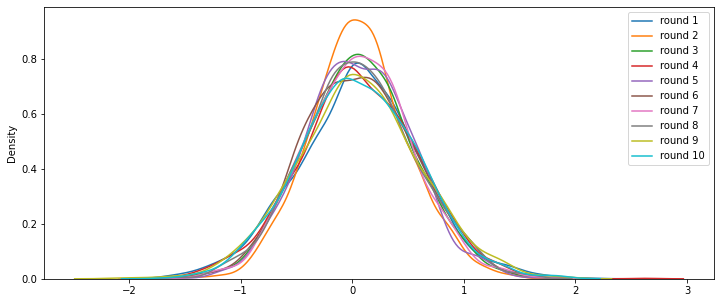

In [37]:
plt.figure(figsize=(12,5))
for round_x in range(10):
    rl_of_high_gen_seq = np.load(os.path.join(NBT_dir,"rl_of_high_gen_seq_round%s.npy"%round_x))
    sns.kdeplot(rl_of_high_gen_seq,label="round %s"%(round_x+1))
plt.legend()

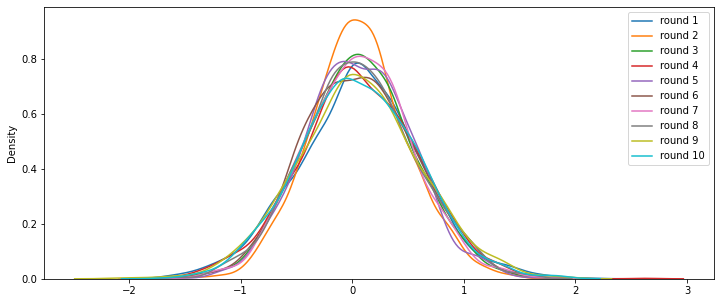

In [39]:
plt.figure(figsize=(12,5))
for round_x in range(10):
    sns.kdeplot(rl_of_high_gen_seq[round_x],label="round %s"%(round_x+1))
plt.legend()